# Assignment 1
Philip O' Connor <br>
21249304

## Part 1
Logistic regression is a variation on multivariable linear regression where the output is reduced to a 1 or 0 using a sigmoid function.  [1]
Input values are multiplied by a weight term and the output is discretised using a logistic funciton, like sigmoid or tanh. Stochastic gradient descent uses one observaton at a time to update the weights of w and b until either the cost function J is below a predefined threshold or it has reached the max number of iterations.

[Fundamentals of Machine Learning for Predictive Data Analytics]

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pdb

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score

In [2]:
class sgd_log_reg():
        
    def fit(self, X, y, alpha, n_iter, tresh, seed):
        # Set seed for the random numers
        np.random.seed(seed)
        # Initialise w with random numbers, one for each column in training dataset
        self.w = np.array(np.random.rand(len(X.columns)))
        self.b = np.random.rand()
        # Store cost in a list, first value is very high. Will use -1 indexing to check against threshold value
        cost_list = [1000]
        for n in range(n_iter+1):
            # SGD - iterate through each observation, one at a time
            for i in range(len(X)):
                # Take a single observation
                xi = X.iloc[i]
                yi = y.iloc[i]

                # Calculate y_hat
                z = np.dot(self.w, xi)+self.b 
                y_hat = 1/(1+np.exp(-z))
                # Calcualte cost funciton 
                cost = -(yi*np.log(y_hat))+((1-yi)*np.log(1-y_hat))

                # While previous cost is higher than threshold
                if cost_list[-1]-cost > tresh:
                    cost_list.append(cost)
                    # Calculate gradients of w and b
                    for weight in self.w:
                        del_w = (y_hat-yi)*xi
                        del_b = y_hat-yi
                    # Update w and b
                    for weight in self.w:
                        self.w = self.w - alpha*del_w
                        self.b = self.b - alpha*del_b

                # If cost is below the threshold then break out of the loop
                elif  cost_list[-1]-cost <= tresh:
                    break
        # If the funciton runs for all n iterations then it has not converged. Print out the warning so user can update hyperparameters.
        if n == n_iter:
            print(f"{n} of {n_iter} iterations ran. Convergence has not happened. Cost is {cost}")
        if n < n_iter:
            print(f"{n} of {n_iter} iterations ran. Convergence has happened. Cost is {cost}")
            
    def predict(self, X):
        z = np.dot(X, self.w)+self.b
        y_hat_test = 1/(1+np.exp(-z))

        # Discretise the output into 1s and 0s
        y_hat_rounded = np.round(y_hat_test,0)
        y_hat_int = [int(i) for i in y_hat_rounded]
        return y_hat_int



## Part 2

In [3]:
# Blobs
df = pd.read_csv("blobs400.csv")
# train/test split~
X_full_train, X_test, y_full_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.15, random_state=42)
# train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_full_train,y_full_train , test_size=0.15, random_state=42)

# train on training dataset
blobs_model = sgd_log_reg()
blobs_model.fit(X_train, y_train, alpha=0.1, n_iter=10000, tresh=10**-6, seed=42)

val_preds = blobs_model.predict(X_val)

# Calculate some performace metrics
f1 = f1_score(y_val, val_preds)
prec = precision_score(y_val, val_preds)
rec = recall_score(y_val, val_preds)

print(f"F1 score: {np.round(f1,2)}\nPrecision:{np.round(prec,2)}\nRecall: {np.round(rec,2)}")

10000 of 10000 iterations ran. Convergence has not happened. Cost is 0.4384361128147499
F1 score: 0.5
Precision:0.67
Recall: 0.4


In [4]:
# calculate predictions from the model. 
test_preds = blobs_model.predict(X_test)

# Calculate some performace metrics
f1 = f1_score(y_test, test_preds)
prec = precision_score(y_test, test_preds)
rec = recall_score(y_test, test_preds)

print(f"F1 score: {np.round(f1,2)}\nPrecision:{np.round(prec,2)}\nRecall: {np.round(rec,2)}")

F1 score: 0.38
Precision:0.47
Recall: 0.32


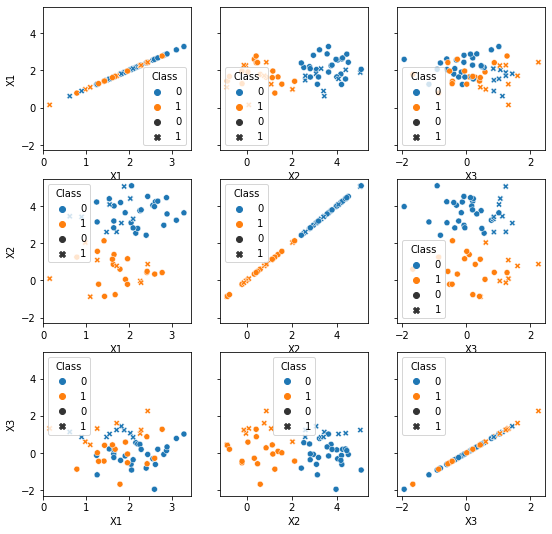

In [5]:
fig, axs = plt.subplots(ncols=3, nrows=3, sharey=True, figsize=(9,9))
sns.scatterplot(x=X_test['X1'], y=X_test['X1'], ax=axs[0,0], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X2'], y=X_test['X1'], ax=axs[0,1], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X3'], y=X_test['X1'], ax=axs[0,2], hue =y_test,  style=test_preds)

sns.scatterplot(x=X_test['X1'], y=X_test['X2'], ax=axs[1,0], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X2'], y=X_test['X2'], ax=axs[1,1], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X3'], y=X_test['X2'], ax=axs[1,2], hue =y_test,  style=test_preds)

sns.scatterplot(x=X_test['X1'], y=X_test['X3'], ax=axs[2,0], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X2'], y=X_test['X3'], ax=axs[2,1], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X3'], y=X_test['X3'], ax=axs[2,2], hue =y_test,  style=test_preds)

In [233]:
df = pd.read_csv("moons500.csv")

# train/test split
X_full_train, X_test, y_full_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=42)
# train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_full_train,y_full_train , test_size=0.2, random_state=42)

# Fit model to data
moons_model = sgd_log_reg()
moons_model.fit(X_train, y_train, alpha=0.1, n_iter=1000, tresh=10**-6, seed=1)
# calculate predictions from the model. Skipping validation as the assignment is coding a logistic regression.

val_preds = moons_model.predict(X_val)

# Calculate some performace metrics
f1 = f1_score(y_val, val_preds)
prec = precision_score(y_val, val_preds)
rec = recall_score(y_val, val_preds)

print(f"F1 score: {np.round(f1,2)}\nPrecision:{np.round(prec,2)}\nRecall: {np.round(rec,2)}")

1000 of 1000 iterations ran. Convergence has not happened. Cost is 0.5674456483493309
F1 score: 0.54
Precision:0.43
Recall: 0.72


In [234]:
test_preds = moons_model.predict(X_test)


# Calculate some performace metrics
f1 = f1_score(y_test, test_preds)
prec = precision_score(y_test, test_preds)
rec = recall_score(y_test, test_preds)

print(f"F1 score: {np.round(f1,2)}\nPrecision:{np.round(prec,2)}\nRecall: {np.round(rec,2)}")

F1 score: 0.58
Precision:0.5
Recall: 0.7


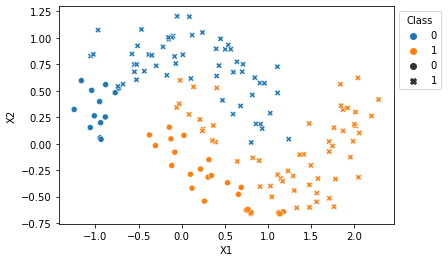

In [235]:
ax = sns.scatterplot(data = X_test, x='X1', y='X2', hue =y_test,  style=test_preds, legend='brief')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Part 3 - Shallow neutal network



In [236]:
def logistic_fn(z):
    return 1/(1+np.exp(-z))

def logistic_derivation(z):
    return logistic_fn(z)*(1-logistic_fn(z))

class shallow_net():
    
    def network_layout(self, n_input, n_nodes, n_output, seed):
        # Build and initialise the network weights and biases with random values between 0 and 1 
        np.random.seed(seed)
        self.n_nodes = n_nodes
        self.hidden_layer_weights = np.random.rand(n_nodes,n_input)
        self.hidden_layer_bias = np.random.rand(n_nodes)
        self.output_layer_weights = np.random.rand(n_nodes)
        self.output_layer_bias = np.random.rand()
    
    def print_network(self):
        # Print out the current weights and biases of the network
        print("Hidden Weights:\n")
        print(self.hidden_layer_weights)
        print("\nHidden Bias:\n")
        print(self.hidden_layer_bias)
        print("Output Weights:\n")
        print(self.output_layer_weights)
        print("\nOutput Bias:\n")
        print(self.output_layer_bias)
    
    def return_network(self):
        # Return values of the network
        return self.hidden_layer_weights, self.hidden_layer_bias, self.output_layer_weights, self.output_layer_bias

 

    def fit(self, X, y, alpha, n_iter, thresh):
        # For each iteration
        
        j2=100
        for n in range(n_iter+1):
            # Check if threshold is met
            if j2 <= thresh:
                break
            else:
                pass
            # Print a progress update
            if n%(n_iter/5)==0:
                print(f"{n}/{n_iter} complete")
            else:
                pass


            # SGD - iterate through each observation, one at a time
            for i in range(len(X_train)):
                # Take a single observation
                xi = X_train.iloc[i]
                yi = y_train.iloc[i]
                # Create some lists to store values in.
                hidden_layer_cost=[]
                a1=np.array([])
                j1 = []
                z1_list=[]
                del_z_hidden_list=[]


                # For each node in hidden layer calculate z, activation and the cost                
                for node in range(self.n_nodes):                  
                # Calculate y_hat
                    z1 = np.dot(self.hidden_layer_weights[node], xi)+self.hidden_layer_bias[node] 
                    y_hat = logistic_fn(z1)
                    a1 = np.append(a1, y_hat)
                    z1_list.append(z1)
                    # Calcualte cost funciton - not used but no harm in tracking
                    hidden_layer_cost.append(-(yi*np.log(y_hat))+((1-yi)*np.log(1-y_hat)))
                    
                # In the output layer calculate z, activation and the cost
                z2 = np.dot(a1,self.output_layer_weights) +self.output_layer_bias
                a2 = logistic_fn(z2)
                # Calcualte cost funciton 
                j2 = -(yi*np.log(a2))+((1-yi)*np.log(1-a2))



                # Back propogation
                # Output node
                del_z_output = a2-yi 
                del_w_output = np.dot(del_z_output,a1)
                del_b_output = del_z_output

                # Hidden Layer
                # For each node in the hidden layer, calc the del_z wrt its output node weight and store in a list
                for node in range(self.n_nodes):
                    del_z_hidden = logistic_derivation(z1_list[node])*(del_z_output* self.output_layer_weights[node])
                    del_z_hidden_list.append(del_z_hidden)
                # Reshape the vectors to return a 2x2 matrix that can be used to update the hidden weights.
                del_w_hidden = np.array(del_z_hidden_list).reshape((self.n_nodes,1))*np.array(xi)

                del_b_hidden = del_z_hidden_list
                
                """ 
                This code was an early attempt at the update phase but had issues with poor performace
                del_z_hidden = logistic_derivation(z1)*(del_z_output* self.output_layer_weights)
                del_z_hidden_list.append(del_z_hidden)
                del_w_hidden = del_z_hidden*xi
                del_b_hidden = del_z_hidden
                
                for node in range(self.n_nodes):
                    self.hidden_layer_weights[node] = self.hidden_layer_weights[node] - alpha*del_w_hidden[node]
                        #print(f"Node {node}. Weight {weight}")
                    self.hidden_layer_bias[node] = self.hidden_layer_bias[node] - alpha*del_b_hidden[node]"""
                    
                # Update the hidden layer weights with the matrix calculated above
                self.hidden_layer_weights = self.hidden_layer_weights - alpha*del_w_hidden
                # Update bidden layer bias
                self.hidden_layer_bias = self.hidden_layer_bias - np.dot(alpha,del_b_hidden)
                    
                self.output_layer_weights = self.output_layer_weights - alpha*del_w_output
                self.output_layer_bias = self.output_layer_bias - alpha*del_b_output
                #pdb.set_trace()
        
        # Creating attributes to query them 
        self.a1 = a1
        self.a2 = a2
        self.del_z_output = del_z_output
        self.del_w_output = del_w_output
        self.del_b_output = del_b_output 

        # Hidden Layer
        self.del_z_hidden = del_z_hidden
        self.del_w_hidden = del_w_hidden
        self.del_b_hidden = del_b_hidden


        print(f"{n} iterations ran")


    def predict(self, X):
        predictions=[]
        for i in range(len(X)):
            # Take a single observation
            xi = X.iloc[i]
            a1_pred = []
            for node in range(self.n_nodes):
                z1 = np.dot(self.hidden_layer_weights[node], xi)+self.hidden_layer_bias[node] 
                y_hat = logistic_fn(z1)
                a1_pred.append(y_hat)
            
            z2 = np.dot(self.output_layer_weights, a1_pred) +self.output_layer_bias
            a2 = logistic_fn(z2)
            predictions.append(a2)
            #pdb.set_trace()
        return [int(i) for i in np.round(predictions,0)]
            

            

                
                



In [237]:
# Blobs
df = pd.read_csv("blobs400.csv")
# train/test split~
X_full_train, X_test, y_full_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.15, random_state=42)
# train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_full_train,y_full_train , test_size=0.15, random_state=42)

blobs_nn = shallow_net()

blobs_nn.network_layout(len(X_train.columns), len(X_train.columns),1, seed=45)

blobs_nn.fit(X_train, y_train, alpha=0.2, n_iter=1000, thresh = 1e-6)

0/1000 complete
200/1000 complete
400/1000 complete


<ipython-input-236-d5b6e88c5da3>:73: RuntimeWarning: divide by zero encountered in log
  hidden_layer_cost.append(-(yi*np.log(y_hat))+((1-yi)*np.log(1-y_hat)))
<ipython-input-236-d5b6e88c5da3>:73: RuntimeWarning: invalid value encountered in multiply
  hidden_layer_cost.append(-(yi*np.log(y_hat))+((1-yi)*np.log(1-y_hat)))


600/1000 complete
800/1000 complete
1000/1000 complete
1000 iterations ran


In [238]:
preds_val = blobs_nn.predict(X_val)
f1 = f1_score(y_val, preds_val)
prec = precision_score(y_val, preds_val)
rec = recall_score(y_val, preds_val)
print(f"Validation:\nF1 score: {np.round(f1,2)}\nPrecision:{np.round(prec,2)}\nRecall: {np.round(rec,2)}")

Validation:
F1 score: 0.98
Precision:1.0
Recall: 0.96


In [239]:
test_preds = blobs_nn.predict(X_test)
f1 = f1_score(y_test, test_preds)
prec = precision_score(y_test, test_preds)
rec = recall_score(y_test, test_preds)
print(f"Testing:\nF1 score: {np.round(f1,2)}\nPrecision:{np.round(prec,2)}\nRecall: {np.round(rec,2)}")

Testing:
F1 score: 0.98
Precision:1.0
Recall: 0.96


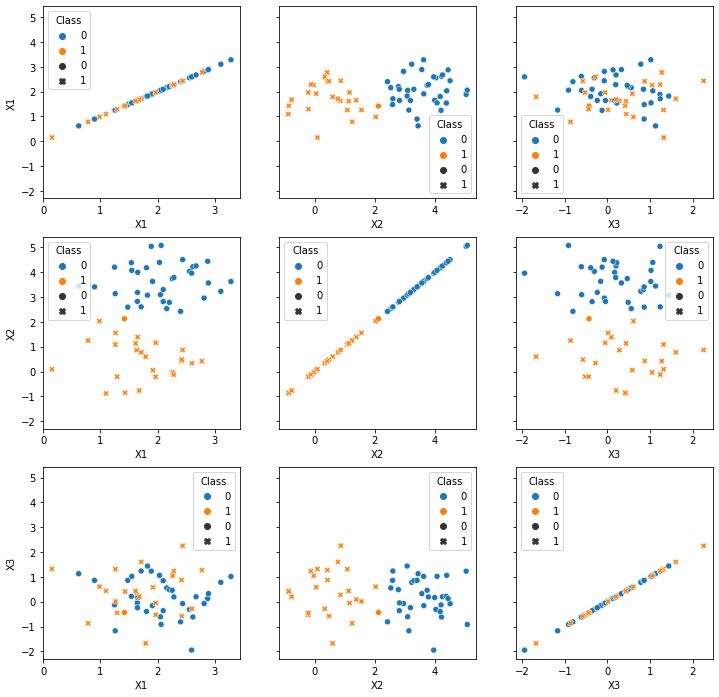

In [240]:
fig, axs = plt.subplots(ncols=3, nrows=3, sharey=True, figsize=(12,12))
sns.scatterplot(x=X_test['X1'], y=X_test['X1'], ax=axs[0,0], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X2'], y=X_test['X1'], ax=axs[0,1], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X3'], y=X_test['X1'], ax=axs[0,2], hue =y_test,  style=test_preds)

sns.scatterplot(x=X_test['X1'], y=X_test['X2'], ax=axs[1,0], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X2'], y=X_test['X2'], ax=axs[1,1], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X3'], y=X_test['X2'], ax=axs[1,2], hue =y_test,  style=test_preds)

sns.scatterplot(x=X_test['X1'], y=X_test['X3'], ax=axs[2,0], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X2'], y=X_test['X3'], ax=axs[2,1], hue =y_test,  style=test_preds)
sns.scatterplot(x=X_test['X3'], y=X_test['X3'], ax=axs[2,2], hue =y_test,  style=test_preds)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [241]:
# Blobs
df = pd.read_csv("moons500.csv")
# train/test split~
X_full_train, X_test, y_full_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.15, random_state=42)
# train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_full_train,y_full_train , test_size=0.15, random_state=42)

moons_nn = shallow_net()

moons_nn.network_layout(len(X_train.columns), len(X_train.columns),1, seed=80)

moons_nn.fit(X_train, y_train, alpha=0.4, n_iter=10000, thresh = 1e-6)

0/10000 complete
2000/10000 complete
4000/10000 complete


<ipython-input-236-d5b6e88c5da3>:73: RuntimeWarning: divide by zero encountered in log
  hidden_layer_cost.append(-(yi*np.log(y_hat))+((1-yi)*np.log(1-y_hat)))
<ipython-input-236-d5b6e88c5da3>:73: RuntimeWarning: invalid value encountered in multiply
  hidden_layer_cost.append(-(yi*np.log(y_hat))+((1-yi)*np.log(1-y_hat)))


6000/10000 complete
8000/10000 complete
10000/10000 complete
10000 iterations ran


In [242]:
trains_preds= moons_nn.predict(X_train)

preds_val = moons_nn.predict(X_val)
f1 = f1_score(y_val, preds_val)
prec = precision_score(y_val, preds_val)
rec = recall_score(y_val, preds_val)
print(f"Validation:\nF1 score: {np.round(f1,2)}\nPrecision:{np.round(prec,2)}\nRecall: {np.round(rec,2)}")

Validation:
F1 score: 0.94
Precision:0.93
Recall: 0.95


In [243]:
test_preds =moons_nn.predict(X_test)
#test_preds.columns = ['y_hat']
f1 = f1_score(y_test, test_preds)
prec = precision_score(y_test, test_preds)
rec = recall_score(y_test, test_preds)
print(f"Testing:\nF1 score: {np.round(f1,2)}\nPrecision:{np.round(prec,2)}\nRecall: {np.round(rec,2)}")

Testing:
F1 score: 0.88
Precision:0.85
Recall: 0.9


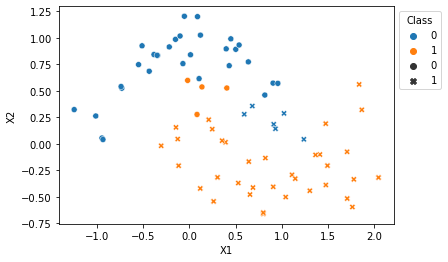

In [244]:
ax = sns.scatterplot(data = X_test, x='X1', y='X2', hue =y_test,  style=test_preds, legend='brief')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Comments

The shallow neural net has performed much better on both datasets on F1, precision and recall. The decision boundaries in the plots are also far more appropriate. In the blobs dataset, there is clear separation of the two classes even when not linearly seperable. 

# Part 4 - Fashion MNIST

The categories assigned to me are tshirt/top and ankle boot. <br>
The index positions of these in the lables provided are 0 and 9 respectively

In [245]:
# This function taken directly from the Fashion-MNIST github site: 
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

# Note: first arg is the path name, second is the file prefix, either 'train' or 't10k' (which is 10k of test data)
def load_mnist(path, kind='train'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.


In [248]:
(train_imgs, train_labels) = load_mnist("fashion-mnist/data/fashion/")
label_names = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
indexs = [train_labels == 9|0]

In [283]:
df = pd.DataFrame(train_imgs[indexs])
df['labels'] = train_labels[indexs]


In [261]:
indexs = train_labels == 9|0

In [287]:
X_train, X_val, y_train, y_val = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.30, random_state=42)


In [292]:
n_inputs = len(X_train.columns)

In [294]:
fashion_nn = shallow_net()

fashion_nn.network_layout(n_inputs, n_inputs,1, seed=80)

fashion_nn.fit(X_train, y_train, alpha=0.4, n_iter=100, thresh = 1e-6)

0/100 complete


<ipython-input-236-d5b6e88c5da3>:73: RuntimeWarning: divide by zero encountered in log
  hidden_layer_cost.append(-(yi*np.log(y_hat))+((1-yi)*np.log(1-y_hat)))
<ipython-input-236-d5b6e88c5da3>:79: RuntimeWarning: divide by zero encountered in log
  j2 = -(yi*np.log(a2))+((1-yi)*np.log(1-a2))


KeyboardInterrupt: 

In [279]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
